In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day42-outlier-removal-using-zscore/placement.csv')

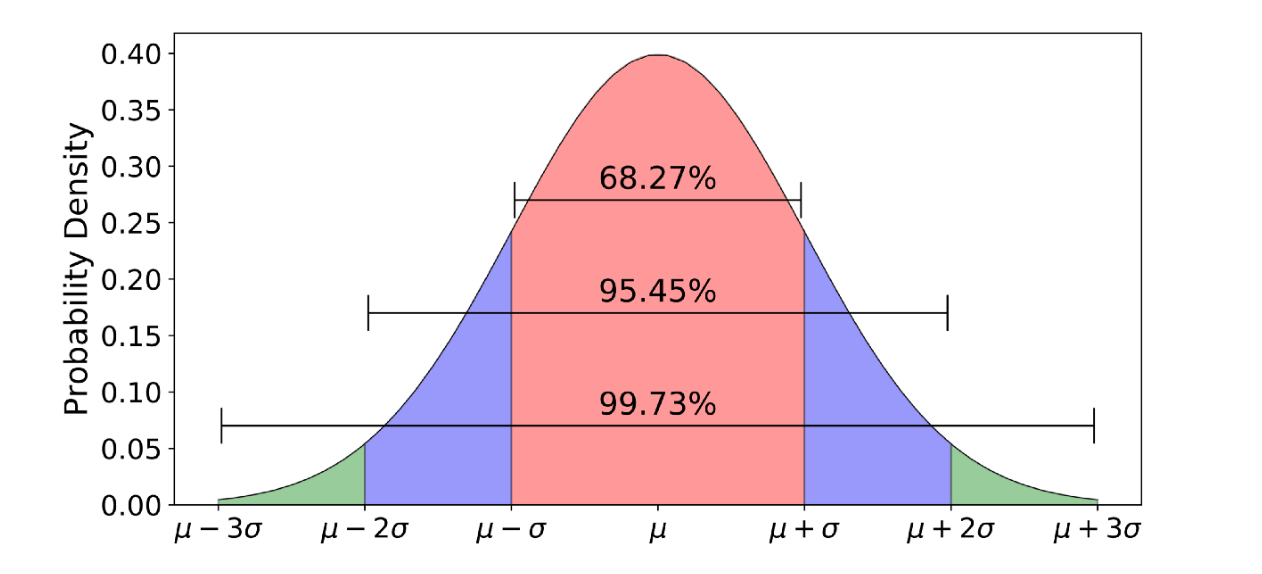

Everything out of -3 sigma and 3 sigma can be treated as OUTLIER
- Z Score Formula (Detech Outlier):  ``` Xi' = (Xi - mean)/sigma ```
- Outlier removal : Trimming (remove rows with it), Capping(lower the outlier to value which is highest non outlier)

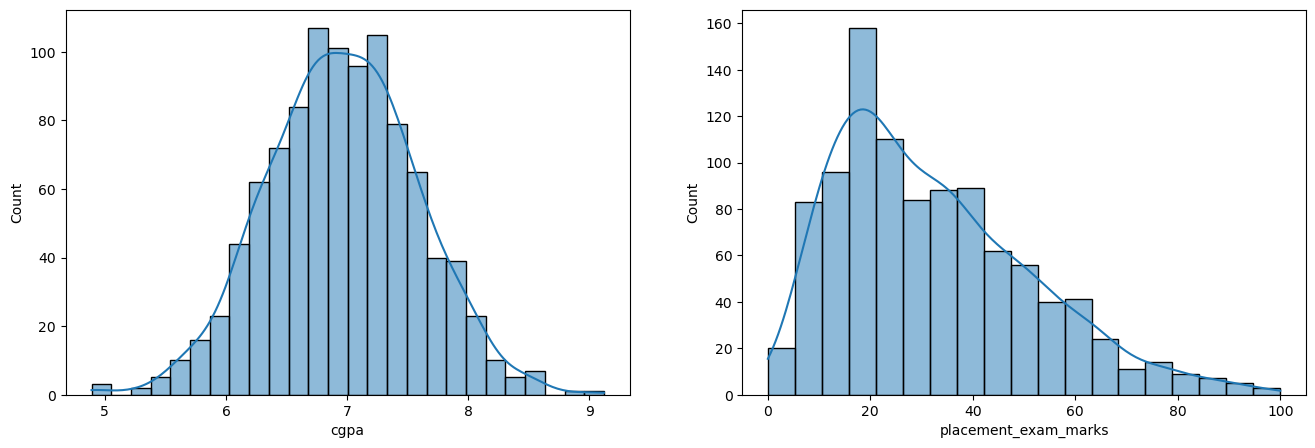

In [213]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.show()

In [214]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [216]:
# Finding the boundary values
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()
print("Highest allowed", upper_limit)
print("Lowest allowed", lower_limit)

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


# Trimming

In [218]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# Z-Score

In [219]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()


In [222]:
# trimmed
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [223]:
new_df2 = df.copy()

In [224]:
# Capping the outliers
new_df2['cgpa'] = np.where(
    df['cgpa']>upper_limit,   # if cgpa higher than upper limit then replace with upperlimit
    upper_limit,
    np.where(
        df['cgpa']<lower_limit, # if cgpa lower than lower limit then replace with lowerlimit
        lower_limit,
        df['cgpa']
    )
)

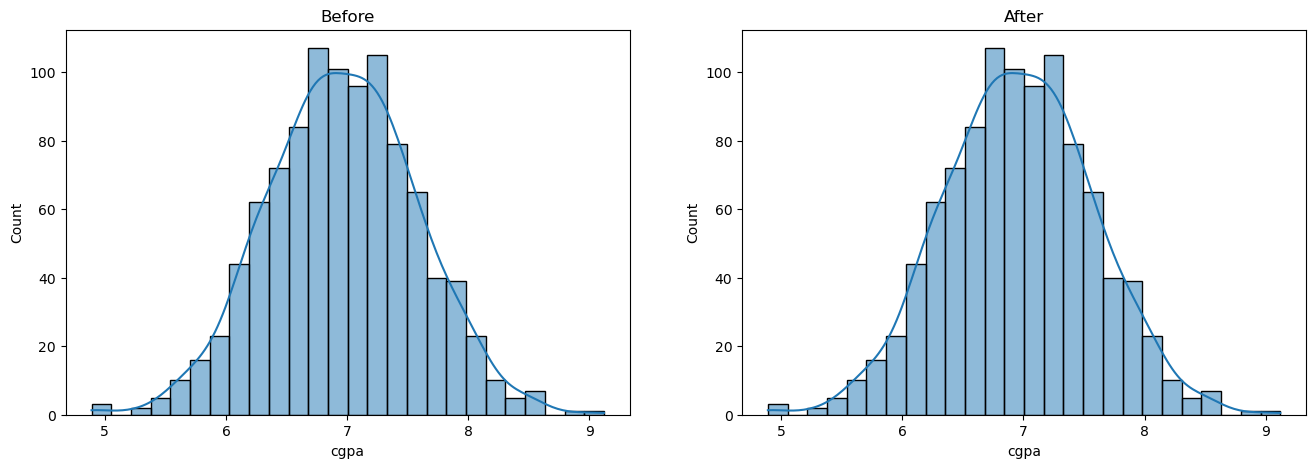

In [233]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)
plt.title('Before')

plt.subplot(1,2,2)
sns.histplot(new_df2['cgpa'], kde=True)
plt.title('After')
plt.show()